# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

## <font color='brown'>파일핸들링 & OS 기본명령어 </font>

### <font color='blue'>Text 파일 생성</font>

In [4]:
def write_txt(filepath):
    # 텍스트 파일에 한줄씩 쓰기(writelines)
    count = 1
    data = []
    print('파일에 내용을 저장하려면 내용을 입력하지 말고 [Enter]를 누르세요')

    while True:
        text = input('[%d] 파일에 저장할 내용을 입력하세요: ' %count)
        if text == '':
            break
        data.append(text+'\n')
        count += 1

    f = open(filepath, 'w')
    f.writelines(data)
    f.close()
    
    ret = 'TEXT 파일을 생성하였습니다.'
    
    return ret

In [5]:
filepath = './data/mydata.txt'
write_txt(filepath)

파일에 내용을 저장하려면 내용을 입력하지 말고 [Enter]를 누르세요
[1] 파일에 저장할 내용을 입력하세요: 여러분, 반갑습니다! 
[2] 파일에 저장할 내용을 입력하세요: 재미있고 유익한 시간이 되길 바랍니다.
[3] 파일에 저장할 내용을 입력하세요: 끝까지 화이팅!!!
[4] 파일에 저장할 내용을 입력하세요: 


'TEXT 파일을 생성하였습니다.'

In [6]:
f = open(filepath, 'r')
data = f.read()
f.close()

print(data)

여러분, 반갑습니다! 
재미있고 유익한 시간이 되길 바랍니다.
끝까지 화이팅!!!



### <font color='blue'>Text 파일 복사</font>

In [7]:
# 텍스트 파일 복사하기(read, write)
f = open('./data/mydata.txt', 'r')
h = open('./data/mydata_copy.txt', 'w')

data = f.read()
h.write(data)

h.close()
f.close()


In [8]:
with open('./data/mydata_copy.txt', 'r') as fp:
    data = fp.read()
    print(data)
    

여러분, 반갑습니다! 
재미있고 유익한 시간이 되길 바랍니다.
끝까지 화이팅!!!



### <font color='blue'>Image 파일 복사</font>

In [9]:
from IPython.display import Image

origin_img = './images/bpc_logo.png'
copied_img = './images/bpc_logo_copy.png'

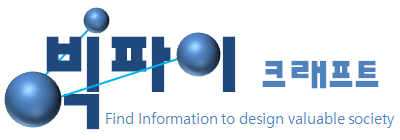

In [10]:
Image(origin_img)

In [11]:
# 바이너리 파일 복사하기(read, write)
bufsize = 1024
f = open(origin_img, 'rb')
h = open(copied_img, 'wb')

data = f.read(bufsize)
while data:
    h.write(data)
    data = f.read(bufsize)

h.close()
f.close()


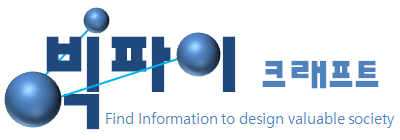

In [12]:
Image(copied_img)

## <font color='brown'>OS 기본명령어 </font>

### <font color='blue'>파일 크기 구하기(ospathgetsize) </font>

In [14]:
# 파일 크기 구하기(ospathgetsize)
from os.path import getsize

file1 = './data/mydata_copy.txt'
file2 = './images/jupyter_logo.png'

# OK !!
# file2 = '/Users/user/Dropbox/sect_tech/src_anaconda/images/jupyter_logo.png'

# SyntaxError
# file2 = 'C:\Users\user\Dropbox\sect_tech\src_anaconda\images\upyter_logo.png'

file_size1 = getsize(file1)
file_size2 = getsize(file2)

print('File Name: %s \t File Size: %d Byte' %(file1, file_size1))
print('File Name: %s \t File Size: %d Byte' %(file2, file_size2))


File Name: ./data/mydata_copy.txt 	 File Size: 79 Byte
File Name: ./images/jupyter_logo.png 	 File Size: 4898 Byte


### <font color='blue'>파일 삭제하기(osremove) </font>

In [20]:
# 파일 삭제하기(osremove)
from os import remove

target_file = './data/mydata_copy.txt'
k = input('[%s] 파일을 삭제하겠습니까? ([y]/n)' %target_file)

if k == 'y' or k == '':
    remove(target_file)
    print('[%s] 파일을 삭제했습니다.' %target_file)


[./data/mydata_copy.txt] 파일을 삭제하겠습니까? ([y]/n)
[./data/mydata_copy.txt] 파일을 삭제했습니다.


### <font color='blue'>파일이름 바꾸기(osrename) </font>

In [23]:
# 파일이름 바꾸기(osrename)
from os import rename

folder_path = './data/'
target_file = folder_path + 'mydata.txt'
newname = input('[%s]에 대한 새로운 파일 이름을 입력하세요: ' %target_file)

# new_file = folder_path + newname
new_file = newname
rename(target_file, new_file)
print('[%s] -> [%s] 로 파일이름이 변경되었습니다.' %(target_file, new_file))


[./data/mydata.txt]에 대한 새로운 파일 이름을 입력하세요: yourdata.txt
[./data/mydata.txt] -> [yourdata.txt] 로 파일이름이 변경되었습니다.


### <font color='blue'>파일을 다른 디렉터리로 이동하기(osrename) </font>

In [27]:
# 파일을 다른 디렉터리로 이동하기(osrename)
from os import rename

# target_file = 'yourdata.txt'
target_file = new_file
newpath = input('[%s]를 이동할 디렉터리의 절대경로를 입력하세요: ' %target_file)

if newpath[-1] == '/':
    newname = newpath + target_file
else:
    newname = newpath + '/' + target_file

try:
    rename(target_file, newname)
    print('[%s] -> [%s]로 이동되었습니다.' %(target_file, newname))
except FileNotFoundError as e:
    print(e)


[yourdata.txt]를 이동할 디렉터리의 절대경로를 입력하세요: /Temp
[yourdata.txt] -> [/Temp/yourdata.txt]로 이동되었습니다.


### <font color='blue'>디렉터리에 있는 파일목록 얻기(os.listdir, glob.glob) </font>

In [31]:
# 디렉터리에 있는 파일목록 얻기(os.listdir, glob.glob)
import os, glob

# folder = 'E:/devlab'
folder = 'data'
file_list1 = os.listdir(folder)
print(file_list1)

# files = '*.txt'
files = 'data/*.txt'
file_list2 = glob.glob(files)
print(file_list2)


['.ipynb_checkpoints', 'company.csv', 'hello.txt', 'students.csv', 'subject.txt']
['data\\hello.txt', 'data\\subject.txt']


### <font color='blue'>현재 디렉터리 확인하고 바꾸기(os.getcwd, os.chdir) </font>

In [32]:
# 현재 디렉터리 확인하고 바꾸기(os.getcwd, os.chdir)
import os

pdir = os.getcwd(); print(pdir)
os.chdir('data');   print(os.getcwd())
os.chdir('..');     print(os.getcwd())
os.chdir(pdir);     print(os.getcwd())


C:\Users\user\Dropbox\sect_tech\src_anaconda\P1810_IITP_Multicampus\s20-python-packages
C:\Users\user\Dropbox\sect_tech\src_anaconda\P1810_IITP_Multicampus\s20-python-packages\data
C:\Users\user\Dropbox\sect_tech\src_anaconda\P1810_IITP_Multicampus\s20-python-packages
C:\Users\user\Dropbox\sect_tech\src_anaconda\P1810_IITP_Multicampus\s20-python-packages


### <font color='blue'>디렉터리 생성하기(osmkdir) </font>

In [35]:
# 디렉터리 생성하기(osmkdir)
import os

newfolder = input('새로 생성할 디렉터리 이름을 입력하세요: ')

try:
    os.mkdir(newfolder)
    print('[%s] 디렉터리를 새로 생성했습니다.' %newfolder)
except Exception as e:
    print(e)


새로 생성할 디렉터리 이름을 입력하세요: atemp
[atemp] 디렉터리를 새로 생성했습니다.


### <font color='blue'>디렉터리 제거하기(osrmdir) </font>

In [36]:
# 디렉터리 제거하기(osrmdir)
import os

target_folder = newfolder
k = input('[%s] 디렉터리를 삭제하겠습니까? (y/n)' %target_folder)
if k == 'y':
    try:
        os.rmdir(target_folder)
        print('[%s] 디렉터리를 삭제했습니다.' %target_folder)
    except Exception as e:
        print(e)


[atemp] 디렉터리를 삭제하겠습니까? (y/n)y
[atemp] 디렉터리를 삭제했습니다.


### <font color='blue'>하위 디렉터리 및 파일 전체 삭제하기(shutil.rmtree) </font>

In [30]:
# 하위 디렉터리 및 파일 전체 삭제하기(shutil.rmtree)
import shutil
import os

target_folder = 'E:/devlab/tmp'
print('[%s] 하위 모든 디렉터리 및 파일들을 삭제합니다.' %target_folder)

for file in os.listdir(target_folder):
    print(file)
k = input('[%s]를 삭제하겠습니까? (y/n) ' %target_folder)

if k == 'y':
    try:
        shutil.rmtree(target_folder)
        print('[%s]의 모든 하위 디렉터리와 파일들을 삭제했습니다.' %target_folder)
    except Exception as e:
        print(e)


[E:/devlab/tmp] 하위 모든 디렉터리 및 파일들을 삭제합니다.
mydata.txt
stockcode.txt
stockcode_part.txt
[E:/devlab/tmp]를 삭제하겠습니까? (y/n) y
[E:/devlab/tmp]의 모든 하위 디렉터리와 파일들을 삭제했습니다.


### <font color='blue'>파일이 존재하는지 체크하기(os.pathexists) </font>

In [31]:
# 파일이 존재하는지 체크하기(os.pathexists)
import os
from os.path import exists

dir_name = input('새로 생성할 디렉터리 이름을 입력하세요: ')

if not exists(dir_name):
    os.mkdir(dir_name)
    print('[%s] 디렉터리를 생성했습니다.' %dir_name)
else:
    print('[%s]은(는) 이미 존재합니다.' %dir_name)


새로 생성할 디렉터리 이름을 입력하세요: E:/devlab/tmp
[E:/devlab/tmp] 디렉터리를 생성했습니다.


### <font color='blue'>파일인지 디렉터리인지 확인하기(os.pathisfile, os.pathisdir) </font>

<hr> 

``` python
# os.listdir

Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str or bytes.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method
```

In [38]:
# 파일인지 디렉터리인지 확인하기(os.pathisfile, os.pathisdir)
import os
from os.path import exists, isdir, isfile

# files = os.listdir('..')
files = os.listdir()

for file in files:
    if isdir(file):
        print('DIR: %s' %file)

for file in files:
    if isfile(file):
        print('FILE: %s' %file)


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>